In [3]:
#Import Stadard Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import Counter

In [4]:
#Load Data Set 

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Drop the unwanted Time column

df = df.drop('Time', axis = 1)

In [6]:
#Check for Null Values

df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Check Descriptive Statistics of the Amount Columns

df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
#Check for Percentage Statistics of Fraudulent vs Genuine Transactions [Non-Fraud: Class 0, Fraud : Class 0]

fraud_trans = len(df[df.Class == 0])
gen_trans = len(df[df.Class == 1])

fraud_pctg = (fraud_trans)/(fraud_trans + gen_trans) * 100

print("Number of Genuine transactions: ", gen_trans)
print("Number of Fraud transactions: ", fraud_trans)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_pctg))




Number of Genuine transactions:  492
Number of Fraud transactions:  284315
Percentage of Fraud transactions: 99.8273


<AxesSubplot:xlabel='Class', ylabel='count'>

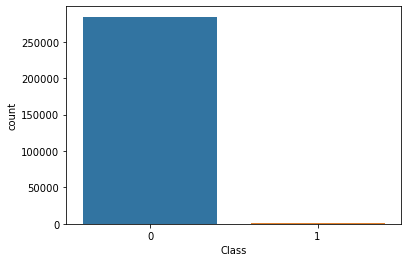

In [9]:
#Plot the above information

sns.countplot(x ='Class', data = df)

In [10]:
#There are more than 99% Genuine Transaction. Thus showing a class imbalance in our data.

## FEATURE SCALING

The Amount column consists of credit card transactions of varying amounts.
These values must be scaled to common scale to prevent biased diagnosis.



In [11]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df["ScaledAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df.drop(["Amount"], inplace= True, axis= 1)

Y = df["Class"]
X = df.drop(["Class"], axis= 1)

In [12]:
#Split Data into Training and Test Sets

from sklearn.model_selection import train_test_split 

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 0)

In [13]:
print(X_train.shape)
print(X_test.shape)

(199364, 29)
(85443, 29)


## Model Building

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

## Train the Model and Perform Predictions

In [15]:
decision_tree.fit(X_train, Y_train)
predictions_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test,Y_test) * 100

random_forest.fit(X_train, Y_train)
predictions_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  99.95201479348805
Decision Tree Score:  99.92977774656788


In [16]:
#As we can see our Random Forest Ensemble Classifier edges the Decision Tree

In [17]:
#Classification Metrics

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score,ConfusionMatrixDisplay


def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))
    

In [18]:
#Confusion Matrix for Decison Tree Model

confusion_matrix_dt = confusion_matrix(Y_test, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)
    

Confusion Matrix - Decision Tree
[[85269    27]
 [   33   114]]


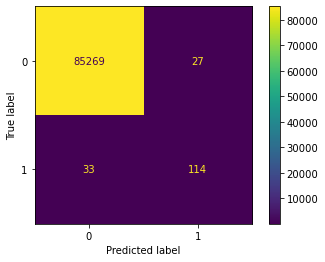

In [19]:
#Plot Confusion Matrix

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dt)
disp.plot()
plt.show()

In [20]:
#Display Decision Tree Metrics

print("Evaluation of Decision Tree Model")
print()
metrics(Y_test, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.99930
Precision: 0.80851
Recall: 0.77551
F1-score: 0.79167


In [21]:
#Confusion Matrix for Random Forest Classifier

confusion_matrix_rf = confusion_matrix(Y_test, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[85289     7]
 [   34   113]]


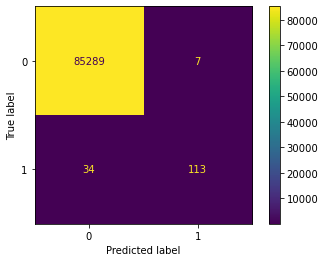

In [22]:
#Plot Confusion Matrix

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf)
disp.plot()
plt.show()

In [23]:
#Display Random Forest Metrics

print("Evaluation of Decision Tree Model")
print()
metrics(Y_test, predictions_rf.round())

Evaluation of Decision Tree Model

Accuracy: 0.99952
Precision: 0.94167
Recall: 0.76871
F1-score: 0.84644


## Class Imbalance in Data

The Random Forest model works better than Decision Trees. But, if we observe our dataset suffers a serious problem of class imbalance. 
The genuine (not fraud) transactions are more than 99% with the credit card fraud transactions constituting 0.17%.

We will address this class Imbalance by Oversampling the Minority Class.

We will employe Synthetic Minority Over Sampling (SMOTE) and perform data augmentataion on the Minority Class.

In [24]:
from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

X_train,X_test,Y_train,Y_test = train_test_split(X_resampled, Y_resampled, test_size = 0.30, random_state = 0)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


In [25]:
#Since Random Forest Algorithm performed better we will apply Random Forest to our resampled data

rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(X_train,Y_train)

predictions_resampled = rf_resampled.predict(X_test)
random_forest_score_resampled = rf_resampled.score(X_test,Y_test) * 100

In [26]:
#Confusion Matrix for Random Forest Classifier

confusion_matrix_rf = confusion_matrix(Y_test, predictions_resampled )
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[85156    16]
 [    0 85417]]


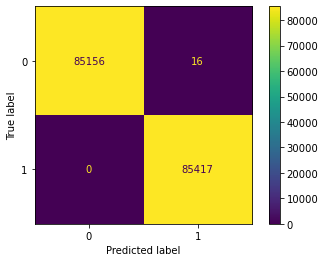

In [27]:
#Plot Confusion Matrix

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf)
disp.plot()
plt.show()

In [28]:
#Display Random Forest Metrics

print("Evaluation of Decision Tree Model")
print()
metrics(Y_test, predictions_resampled.round())

Evaluation of Decision Tree Model

Accuracy: 0.99991
Precision: 0.99981
Recall: 1.00000
F1-score: 0.99991


C:\Users\shash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


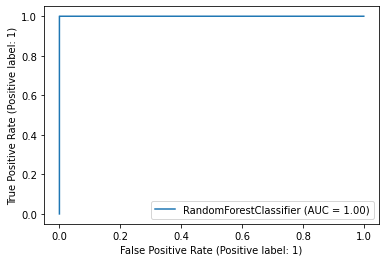

In [29]:
from sklearn import metrics

metrics.plot_roc_curve(rf_resampled, X_test, Y_test)